In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
#On importe un dataframe mergé qui est plus facile à manipuler

df = pd.read_excel('./data/data_merged.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Equity,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Total Water Use,wacc2010-09,wacc2010-12,wacc2011-03,wacc2011-06,wacc2011-09,...,ebita2020-03,ebita2020-06,ebita2020-09,ebita2020-12,ebita2021-03,ebita2021-06,ebita2021-09,ebita2021-12,ebita2022-03,ebita2022-06
0,BP/ LN Equity,65.224826,55.662942,47.400242,239400.0,13.8157,12.5954,11.9617,10.6557,9.9863,...,-11.6489,-95.2544,3.9298,3.1319,18.6082,13.5575,-3.4970,6.7156,-37.2325,21.0282
1,STERV FH Equity,72.980585,75.022652,53.990326,529000.0,10.6280,11.3019,10.3938,10.8575,10.2827,...,12.8228,10.5960,6.6378,12.9062,6.7223,8.2562,15.6771,26.8481,12.1515,12.1480
2,IP US Equity,58.686249,61.099366,29.866989,645597.0,9.3207,11.9747,9.7991,9.7655,9.3437,...,1.7750,7.4599,7.4761,2.5450,7.5550,6.0168,16.7658,2.0645,7.2943,10.0390
3,UPM FH Equity,67.417765,62.035639,50.272068,414000.0,10.4925,11.3867,10.7062,10.8963,11.1329,...,10.6253,7.1257,5.7199,11.5631,12.4888,12.7517,22.3543,15.5256,7.3394,12.9977
4,NEM US Equity,67.196459,59.830867,49.652358,452719.0,8.6187,8.8330,9.3028,9.6432,9.1139,...,40.6819,18.1818,31.5142,27.2109,29.8050,31.3540,2.2798,-18.4661,26.4307,17.6586


In [3]:
#On se concentre ici sur les rendements, donc on garde seulement les colonnes en rapport
#On ajoute ensuite deux colonnes : la volatilité et le return moyen

d = df.columns
l = []
for i in d:
    if(i[0:7] == 'returns'):
        l=l+[i]

equities = df['Equity']
df_rend = df[l]

standard_error = df_rend.std(axis=1)
mean_return = df_rend.mean(axis=1)

df_rend['volatility'] = standard_error
df_rend['mean_return'] = mean_return


df_rend.head()


,returns2017-10,returns2017-11,returns2017-12,returns2018-01,returns2018-02,returns2018-03,returns2018-04,returns2018-05,returns2018-06,returns2018-07,...,returns2022-02,returns2022-03,returns2022-04,returns2022-05,returns2022-06,returns2022-07,returns2022-08,returns2022-09,volatility,mean_return
0,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.240530,4.804592,-0.400296,-1.368019,...,-4.400586,1.302829,-0.138040,12.521070,-13.72032,2.945457,6.652520,-6.079655,8.215153,0.340750
1,10.909070,-2.246577,3.931891,7.955951,3.713166,5.921066,8.415009,2.725725,-4.206706,-15.460060,...,-4.304833,5.968121,0.961133,-3.003349,-18.85769,-2.110731,-2.613566,-14.310720,9.403090,0.523926
2,0.791975,-0.288225,2.349408,8.491543,-4.425673,-10.337310,-3.499906,4.665303,-2.654206,3.168203,...,-8.877665,6.018837,0.281690,5.683481,-13.66357,2.247191,-1.677647,-23.834690,7.744599,-0.226696
3,11.038760,0.068212,3.580244,8.171395,2.290289,7.340285,0.958194,2.068292,-2.465006,-0.611367,...,-3.697308,-1.303543,6.038125,1.580805,-14.10452,3.575494,8.173311,-6.389768,7.545553,0.933991
4,-3.599040,2.295354,1.644609,7.969083,-5.702296,2.657297,0.563092,-0.916264,-2.783047,-2.731371,...,8.222985,20.883980,-8.307112,-6.863418,-11.33698,-24.115970,-8.657244,2.939662,9.153569,0.828072


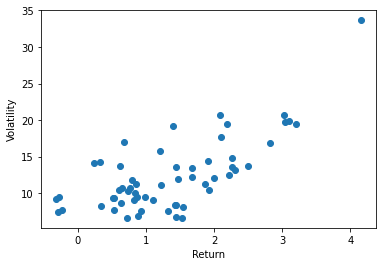

In [4]:
#Question 7
# Grâce aux colonnes créées ci-dessus, le graphe peut être obtenu très simplement

plt.scatter(df_rend['mean_return'], df_rend['volatility'])
plt.xlabel("Return")
plt.ylabel("Volatility");

In [5]:
#Question 8

#On génère un portfolio (les noms et des poids associés)
def generate_pf():
    n = random.randint(5,25)
    weights = [random.randint(1,10) for i in range(n)]
    weights = [i/sum(weights) for i in weights]
    
    l = random.sample(equities.tolist(), n)
    return(l,weights)

#On construit ce portfolio (on prend les rendements et la volatilité)
def build_pf(l,p):
    df = pd.DataFrame()
    for i in range(len(l)):
        index = equities[equities == l[i]].index[0]
        ligne = df_rend.iloc[index]
        ligne['weight'] = p[i]
        df = df.append(ligne)
        
    df['names'] = l
    return(df)    

#Calcul de volatilité d'un portfolio
def vola_pf(df):
    v = df['volatility'].mean()
    return(v)

#Calcul de rendement d'un portfolio
def rend_pf(df):
    p = df['mean_return']*df['weight']
    r = p.mean()
    return(r)

#liste des portfolios
possible_pf = [] 

l_vola = []
l_rend = []

#On remplit cette liste de 300 porte feuilles aléatoires (tester toutes les combinaisons serait impossible)
for i in range(300):
    l,p=generate_pf()
    pf_i = build_pf(l,p)
    possible_pf = possible_pf + [pf_i]
    l_vola = l_vola + [vola_pf(pf_i)]
    l_rend = l_rend + [rend_pf(pf_i)]
    
#On affiche un portfolio de la liste pour vérifier qu'il s'est bien généré
possible_pf[1]

,returns2017-10,returns2017-11,returns2017-12,returns2018-01,returns2018-02,returns2018-03,returns2018-04,returns2018-05,returns2018-06,returns2018-07,...,returns2022-04,returns2022-05,returns2022-06,returns2022-07,returns2022-08,returns2022-09,volatility,mean_return,weight,names
0,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.240530,4.804592,-0.400296,-1.368019,...,-0.138040,12.521070,-13.720320,2.945457,6.652520,-6.079655,8.215153,0.340750,0.007194,BP/ LN Equity
43,1.443676,4.256030,10.772880,5.820075,-6.932371,1.006913,17.330310,-4.192508,-1.998964,0.015853,...,-7.023157,22.710760,-19.738070,6.217501,6.866427,-11.458160,12.234556,1.678758,0.071942,PXD US Equity
52,-9.128740,1.111917,0.932345,6.853610,-23.891240,12.679360,7.060770,-2.319902,16.875000,-1.049998,...,-0.674409,14.854630,-25.760480,6.904209,5.219263,-12.579900,33.666084,4.149615,0.057554,APA US Equity
57,9.391588,2.006346,15.497210,-0.594059,-0.685259,1.508344,1.525450,-5.899444,8.951639,0.288820,...,-7.915086,23.363140,-20.306540,5.670656,6.590806,-9.618848,17.646509,2.105315,0.035971,FANG US Equity
5,1.671139,0.855728,0.420218,4.375897,-12.360140,-1.491946,4.208551,5.542889,1.834072,-1.474677,...,3.220729,13.758250,-10.791670,13.183090,-0.451188,-8.661994,9.524520,0.992708,0.050360,XOM US Equity
18,6.134326,-7.029782,-0.057551,5.525747,0.060247,-0.601478,1.501176,0.398628,-7.197887,2.452962,...,-5.381672,-5.216986,-4.484504,0.001683,0.938683,-7.552686,6.657187,0.727300,0.043165,WIL SP Equity
39,1.505902,0.975139,5.556843,5.363336,-6.877724,0.087999,6.500294,3.246239,-0.828526,0.741026,...,0.365345,8.826830,-13.542000,6.298485,7.007623,-6.967280,6.726109,1.434597,0.007194,CTVA US Equity
27,-0.578539,7.925572,3.679787,1.235788,-11.076490,6.141418,16.044620,5.349448,-3.588291,9.821031,...,0.428290,17.395810,-18.668780,8.549823,1.601769,-9.769730,11.880699,0.801919,0.071942,PSX US Equity
49,4.867257,4.711674,14.083560,7.442410,-19.924110,11.088150,13.143210,17.700690,-2.659823,1.246405,...,-0.756671,26.479370,-28.475980,10.320280,3.543611,-11.762410,20.657099,3.031980,0.028777,MRO US Equity
6,2.547771,9.456333,7.346415,4.417365,-4.934638,2.598983,19.575290,10.018210,-8.556106,6.785166,...,9.789246,17.200130,-17.993830,4.224689,6.693716,-8.768785,14.380837,1.916323,0.050360,VLO US Equity


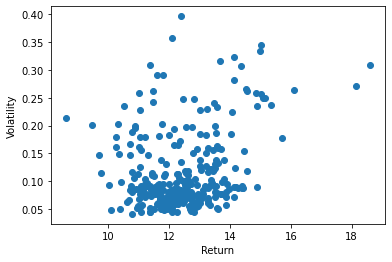

In [6]:
#Affichage des portfolios sur un plan rendement volatilité

plt.scatter(l_vola,l_rend)
plt.xlabel("Return")
plt.ylabel("Volatility");

In [7]:
#Question 9 

v = 1000
for i in possible_pf:
    if(vola_pf(i)<v):
        meilleur = i
        
rend_meilleur = rend_pf(meilleur)
vola_meilleur = vola_pf(meilleur)

compo = meilleur[['names','weight']]


print("Portfolio return: ", rend_meilleur)
print("Portfolio volatility: ", vola_meilleur)
print('Composition du portfolio :')
compo

Portfolio return:  0.0702056837701613
Portfolio volatility:  13.08771960883141
Composition du portfolio :


,names,weight
3,UPM FH Equity,0.032258
17,RIO US Equity,0.048387
29,ET US Equity,0.008065
40,OXY US Equity,0.040323
46,BKR US Equity,0.048387
43,PXD US Equity,0.040323
28,WY US Equity,0.056452
7,NUE US Equity,0.064516
42,CVX US Equity,0.080645
52,APA US Equity,0.080645


In [8]:
#Question 10

df_rend['mean_return'].mean()

portfolio_return = df_rend['mean_return'].mean()


portfolio_volatility = df_rend['volatility'].mean()


sharpe_ratio = portfolio_return / portfolio_volatility

# Print results
print("Portfolio return: ", portfolio_return)
print("Portfolio volatility: ", portfolio_volatility)
print("Sharpe ratio: ", sharpe_ratio)

Portfolio return:  1.3570472394439652
Portfolio volatility:  12.384138720560406
Sharpe ratio:  0.10957946047478999
